# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

# Difference between batch and mini-batch

In this notebook I will discuss a bit more deeply the difference between batch and mini-batch Gradient descent variations. To do this I will use the Zalando dataset. The main discussion is after the data preparation, that you can find in the second half of the notebook. But first let's discuss the mathematics of it.

You remember that the weight update is done with the GD algorithm. Meaning that once we define the cost function $J$ the weight update for the weight $i$ is given by the formula

$$
w_{i,[n+1]} = w_{i,[n]} - \gamma \frac{\partial J}{\partial w_i}
$$

Let's make an example and let's consider for example a case when we do regression and we have, given $m$ observations the formula

$$
J = \frac{1}{m}\sum_{i=1}^m \left( 
y^{(i)}-\hat y^{(i)}
\right)^2
$$

where $y^{(i)}$ is the target variable for the $i^{th}$ observation and $\hat y^{(i)}$ is the network output for the $i^{th}$ observation.

Note how this sum is done over a set of observations ($m$ in this case). Here comes the idea.
Let's consider different cases:

1. **Batch GD**
here the cost function is defined as a sum over **all** observations we have in our dataset. For example if we have 60000 observations this sum is over all 60000 of them

2. **mini-batch GD**
in this case, supposing we have mini-bathc size of $50$, the cost function is defined as a sum over **only 50 observations**.

Basically the main idea with mini-batch GD you derive each time a different cost function (so to speak) to update the weights. 

**IMPORTANT**: the functional form of the derivative does not change. The only thing that change is the fact that the sum is performed over a different set of observations. This is also the reasons why often when doing mini-batch GD you observe the cost function oscillates during training.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl

# Generic matplotlib parameters for plots and figures
mpl.rcParams['figure.figsize'] = [8,5]
font = {'size'   : 16}
mpl.rc('font', **font)

In [2]:
# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

In [3]:
X_ = x.reshape(1,30)
Y_ = y.reshape(1,30)

The data is a perfect line

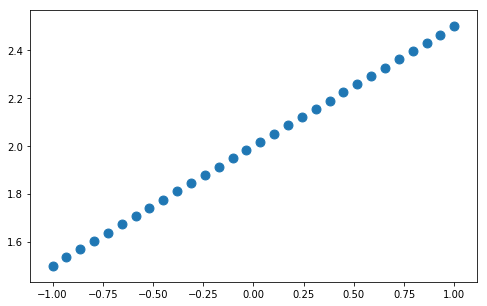

In [4]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x,y, s = 80)

The goal of this notebook is to compare different optimizers in finding the parameters of the line, that is $w=0.5$ and $b=2.0$.

## Network building Phase

In [145]:
W1_initial = 2.5
b_initial = 1.0

n_dim = 1
tf.reset_default_graph()
tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())

W1 = tf.Variable(tf.constant(W1_initial, shape= [1,1]))
b1 = tf.Variable(tf.constant(b_initial, shape = [1,1]) )
    
y_ = tf.matmul(W1, X) + b1 
cost = tf.reduce_mean(tf.square(y_-Y))
    
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #GradientDescentOptimizer
    
init = tf.global_variables_initializer()

In [148]:
def run_linear_model(training_epochs, mini_batch_size , train_obs, train_labels, debug = False, 
                     learning_r = 0.001):
    sess = tf.Session()
    sess.run(init)
    
    
    
    cost_history = np.empty(shape=[0], dtype = float)
    W = np.empty(shape = 0, dtype = float)
    b = np.empty(shape = 0, dtype = float)
    
    W = np.append(W, 2.5)
    b = np.append(b,1.0)
    
    feed_dict_input = {X: train_obs, Y: train_labels, learning_rate: learning_r}
    for epoch in range(training_epochs+1):
        for i in range(0, train_obs.shape[1], mini_batch_size):
            X_train_mini = train_obs[:,i:i + mini_batch_size]
            y_train_mini = train_labels[:,i:i + mini_batch_size]

            sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: 0.001})
        
        
        cost_ = sess.run(cost, feed_dict=feed_dict_input)
        W_ = sess.run(W1, feed_dict=feed_dict_input)
        b_ = sess.run(b1, feed_dict=feed_dict_input)
        
        
        cost_history = np.append(cost_history, cost_)
        W = np.append(W, W_)
        b = np.append(b, b_)
                
        if (epoch % 100 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history, W, b

## Gradient Descent

**Check the speed (in seconds) difference between mini_batchsize = 1 and 30.**

In [149]:
sessad, cost_ad, Woutput, boutput = run_linear_model(400, 1, X_, Y_, 
                                                   debug = True, learning_r = 0.05)
# Let's print the best parameters found
print(Woutput[-1])
print(boutput[-1])

Reached epoch 0 cost J = 2.358762
Reached epoch 100 cost J = 0.077261
Reached epoch 200 cost J = 0.000002
Reached epoch 300 cost J = 0.000000
Reached epoch 400 cost J = 0.000000
0.5000001192092896
1.9999996423721313


In [150]:
sessad, cost_ad, Woutputad_b, boutputad_b = run_linear_model(2000, 30 , X_, Y_, 
                                                   debug = True, learning_r = 0.05)
# Let's print the best parameters found
print(Woutput[-1])
print(boutput[-1])

Reached epoch 0 cost J = 2.421864
Reached epoch 100 cost J = 2.097573
Reached epoch 200 cost J = 1.810749
Reached epoch 300 cost J = 1.558490
Reached epoch 400 cost J = 1.337649
Reached epoch 500 cost J = 1.145191
Reached epoch 600 cost J = 0.978208
Reached epoch 700 cost J = 0.833928
Reached epoch 800 cost J = 0.709727
Reached epoch 900 cost J = 0.603145
Reached epoch 1000 cost J = 0.511901
Reached epoch 1100 cost J = 0.433908
Reached epoch 1200 cost J = 0.367289
Reached epoch 1300 cost J = 0.310378
Reached epoch 1400 cost J = 0.261728
Reached epoch 1500 cost J = 0.220099
Reached epoch 1600 cost J = 0.184446
Reached epoch 1700 cost J = 0.153899
Reached epoch 1800 cost J = 0.127740
Reached epoch 1900 cost J = 0.105376
Reached epoch 2000 cost J = 0.086314
0.5000001192092896
1.9999996423721313


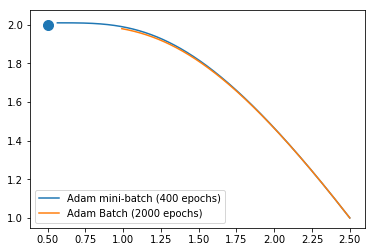

In [151]:
plt.scatter(0.5, 2.0, s= 100)
plt.plot(Woutputgd, boutputgd, label = 'Adam mini-batch (400 epochs)')
plt.plot(Woutputgd_b, boutputgd_b, label = 'Adam Batch (2000 epochs)')
# To change the zoom level uncomment the following lines
#plt.xlim(0.48,0.51)
#plt.ylim(1.98, 2.02)
plt.legend()

Check how much more efficient is when we use mini-batch GD.

Note that in this case the $J$ is not oscillating since we have few perfectly aligned data. So everything works perfectly.